In [1]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

# showing all columns
pd.options.display.max_columns = None

In [2]:
#reading the doc
df = pd.read_excel('owid-energy-data.xlsx')
df

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,energy_cons_change_twh,biofuel_share_elec,biofuel_elec_per_capita,biofuel_cons_change_pct,biofuel_share_energy,biofuel_cons_change_twh,biofuel_consumption,biofuel_cons_per_capita,carbon_intensity_elec,coal_share_elec,coal_cons_change_pct,coal_share_energy,coal_cons_change_twh,coal_consumption,coal_elec_per_capita,coal_cons_per_capita,coal_production,coal_prod_per_capita,electricity_generation,biofuel_electricity,coal_electricity,fossil_electricity,gas_electricity,hydro_electricity,nuclear_electricity,oil_electricity,other_renewable_electricity,other_renewable_exc_biofuel_electricity,renewables_electricity,solar_electricity,wind_electricity,energy_per_gdp,energy_per_capita,fossil_cons_change_pct,fossil_share_energy,fossil_cons_change_twh,fossil_fuel_consumption,fossil_energy_per_capita,fossil_cons_per_capita,fossil_share_elec,gas_share_elec,gas_cons_change_pct,gas_share_energy,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_energy_per_capita,gas_production,gas_prod_per_capita,hydro_share_elec,hydro_cons_change_pct,hydro_share_energy,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_energy_per_capita,low_carbon_share_elec,low_carbon_electricity,low_carbon_elec_per_capita,low_carbon_cons_change_pct,low_carbon_share_energy,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_energy_per_capita,nuclear_share_elec,nuclear_cons_change_pct,nuclear_share_energy,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_energy_per_capita,oil_share_elec,oil_cons_change_pct,oil_share_energy,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_energy_per_capita,oil_production,oil_prod_per_capita,other_renewables_elec_per_capita,other_renewables_share_elec,other_renewables_cons_change_pct,other_renewables_share_energy,other_renewables_cons_change_twh,other_renewable_consumption,other_renewables_energy_per_capita,per_capita_electricity,population,primary_energy_consumption,renewables_elec_per_capita,renewables_share_elec,renewables_cons_change_pct,renewables_share_energy,renewables_cons_change_twh,renewables_consumption,renewables_energy_per_capita,solar_share_elec,solar_cons_change_pct,solar_share_energy,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
0,AFG,Afghanistan,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5021241.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1901,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5053439.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,1902,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [3]:
columns = []
for index in df.columns:
    columns.append(index)
print(columns)

['iso_code', 'country', 'year', 'coal_prod_change_pct', 'coal_prod_change_twh', 'gas_prod_change_pct', 'gas_prod_change_twh', 'oil_prod_change_pct', 'oil_prod_change_twh', 'energy_cons_change_pct', 'energy_cons_change_twh', 'biofuel_share_elec', 'biofuel_elec_per_capita', 'biofuel_cons_change_pct', 'biofuel_share_energy', 'biofuel_cons_change_twh', 'biofuel_consumption', 'biofuel_cons_per_capita', 'carbon_intensity_elec', 'coal_share_elec', 'coal_cons_change_pct', 'coal_share_energy', 'coal_cons_change_twh', 'coal_consumption', 'coal_elec_per_capita', 'coal_cons_per_capita', 'coal_production', 'coal_prod_per_capita', 'electricity_generation', 'biofuel_electricity', 'coal_electricity', 'fossil_electricity', 'gas_electricity', 'hydro_electricity', 'nuclear_electricity', 'oil_electricity', 'other_renewable_electricity', 'other_renewable_exc_biofuel_electricity', 'renewables_electricity', 'solar_electricity', 'wind_electricity', 'energy_per_gdp', 'energy_per_capita', 'fossil_cons_change_pc

In [4]:
energyny = df[['country','renewables_electricity','other_renewables_elec_per_capita','other_renewables_energy_per_capita','renewables_elec_per_capita','renewables_energy_per_capita','renewables_share_energy']]
energyny

,country,renewables_electricity,other_renewables_elec_per_capita,other_renewables_energy_per_capita,renewables_elec_per_capita,renewables_energy_per_capita,renewables_share_energy
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
17427,Zimbabwe,5.076,9.265,NaN,367.427,NaN,NaN
17428,Zimbabwe,3.111,10.478,NaN,221.739,NaN,NaN
17429,Zimbabwe,4.091,10.606,NaN,287.350,NaN,NaN
17430,Zimbabwe,5.201,12.951,NaN,360.205,NaN,NaN


In [5]:
energygrouped = energyny.groupby('country').mean().sort_values('renewables_electricity', ascending=False)
ea = energygrouped['renewables_electricity'].head(60).round(0)
ea

country
World                      3644.0
Asia Pacific               1001.0
North America               822.0
Europe                      795.0
China                       605.0
South & Central America     593.0
United States               429.0
Canada                      363.0
Brazil                      334.0
CIS                         216.0
Russia                      172.0
Japan                       132.0
Norway                      123.0
India                       122.0
Africa                       91.0
Germany                      83.0
Sweden                       79.0
France                       76.0
Italy                        65.0
Venezuela                    59.0
Spain                        57.0
Other South America          56.0
Paraguay                     54.0
Turkey                       47.0
Austria                      42.0
Eastern Africa               41.0
Colombia                     38.0
Mexico                       38.0
Switzerland                  37.0
Other 

In [6]:
world = {'World': ea[0]}
continents = {
    'Asia Pacific': ea[1],
    'North America':ea[2],
    'Europe':ea[3],
    'S.C. America':ea[5]}

countries = {
    'China':ea[4],
    'United States':ea[6],
    'Canada':ea[7],
    'Brazil':ea[8],
    'Russia':ea[10]}

In [7]:
names = list(continents.keys())
values = list(continents.values())

ValueError: too many values to unpack (expected 2)

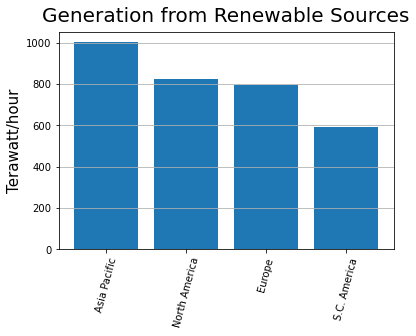

In [9]:
plt.grid(True, axis='y')
plt.xticks(rotation=75)
plt.ylabel('Terawatt/hour', size=15)
plt.title('Generation from Renewable Sources', size=20,pad=10)
fig,axs = plt.bar(names,values)




In [11]:
names1 = list(countries.keys())
values1 = list(countries.values())

ValueError: too many values to unpack (expected 2)

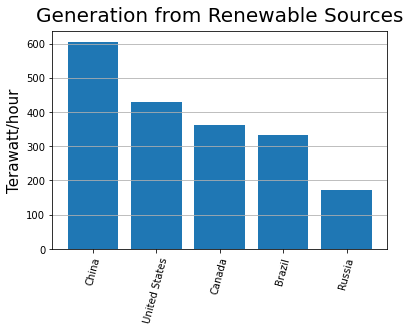

In [12]:
plt.grid(True, axis='y')
plt.xticks(rotation=75)
plt.ylabel('Terawatt/hour', size=15)
plt.title('Generation from Renewable Sources', size=20,pad=10)
fig,axs = plt.bar(names1,values1)


In [13]:
countries_renew_sum = sum(countries.values())

In [14]:
world_renew_sum = sum(world.values())
countries_world_gen = countries_renew_sum/world_renew_sum
countries_world_gen



0.5222283205268935

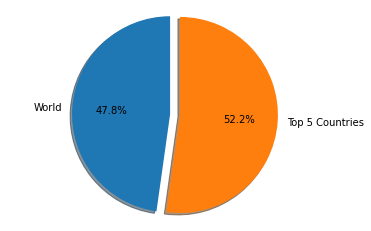

In [15]:
labels = 'World', 'Top 5 Countries'
sizes = [(world_renew_sum-countries_renew_sum), countries_renew_sum]
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

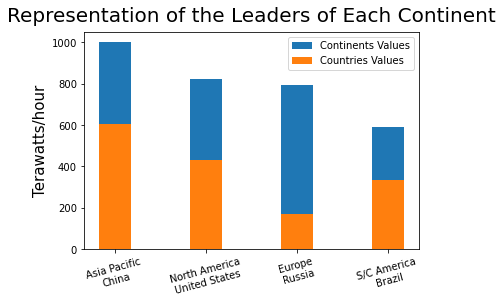

In [16]:
labels = ['Asia Pacific\nChina', 'North America\nUnited States', 'Europe\nRussia', 'S/C America\nBrazil']
conts_values = [ea[1], ea[2], ea[3], ea[5]]
countries_values = [ea[4], ea[6], ea[10], ea[8]]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, conts_values, width, label='Continents Values')
ax.bar(labels, countries_values, width, label='Countries Values')

ax.set_ylabel('Terawatts/hour', size=15)
plt.xticks(rotation=15)
ax.set_title('Representation of the Leaders of Each Continent', size=20, pad=10)
ax.legend()

plt.show()

# Renewable Sources - Share of Energy

In [17]:
renewables_share_energy = df[['country','year','renewables_share_energy']]
renewables_share_energy.count()

country                    17432
year                       17432
renewables_share_energy     4284
dtype: int64

In [18]:
renewables_share_energy.fillna(0, inplace=True)

C:\Users\Samsung\anaconda3\lib\site-packages\pandas\core\frame.py:4317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [19]:
renewables_share_energy.sort_values('renewables_share_energy',ascending=False, inplace=True)

<ipython-input-19-87a43bc735f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renewables_share_energy.sort_values('renewables_share_energy',ascending=False, inplace=True)


In [20]:
renewables_share_energy2 = renewables_share_energy.groupby('country').mean().sort_values('renewables_share_energy',ascending=False)
renewables_share_energy2

,year,renewables_share_energy
country,,
Iceland,1992.0,59.919364
New Zealand,1992.5,37.067125
Norway,1960.0,30.233686
Switzerland,1992.5,29.660643
Sri Lanka,1992.0,22.339836
...,...,...
Honduras,1999.5,0.000000
Jamaica,1999.5,0.000000
Jordan,1999.5,0.000000


In [21]:
renewables_share_energy3 = renewables_share_energy2.loc[renewables_share_energy2['renewables_share_energy'] > 0]
renewables_share_energy3

,year,renewables_share_energy
country,,
Iceland,1992.0,59.919364
New Zealand,1992.5,37.067125
Norway,1960.0,30.233686
Switzerland,1992.5,29.660643
Sri Lanka,1992.0,22.339836
...,...,...
Turkmenistan,1999.5,0.005675
Qatar,1959.5,0.004558
Saudi Arabia,1992.0,0.004018


In [22]:
renewables_share_energy3.tail(42)

,year,renewables_share_energy
country,,
Japan,1960.0,2.676512
Morocco,1959.5,2.495567
China,1960.0,2.402876
Lithuania,2000.0,2.223805
Australia,1960.0,2.209231
Greece,1960.0,2.188661
United States,1960.0,2.178769
Thailand,1960.0,2.068174
Malaysia,1959.5,1.926458


In [23]:
renewables_share_energy3.reset_index(inplace=True)

In [24]:
renewables_share_energy3.head(50)

,country,year,renewables_share_energy
0,Iceland,1992.0,59.919364
1,New Zealand,1992.5,37.067125
2,Norway,1960.0,30.233686
3,Switzerland,1992.5,29.660643
4,Sri Lanka,1992.0,22.339836
5,Croatia,2005.0,17.936097
6,Latvia,2002.5,16.983583
7,Brazil,1960.0,16.715678
8,Finland,1992.5,16.591161
9,Sweden,1960.0,14.541347


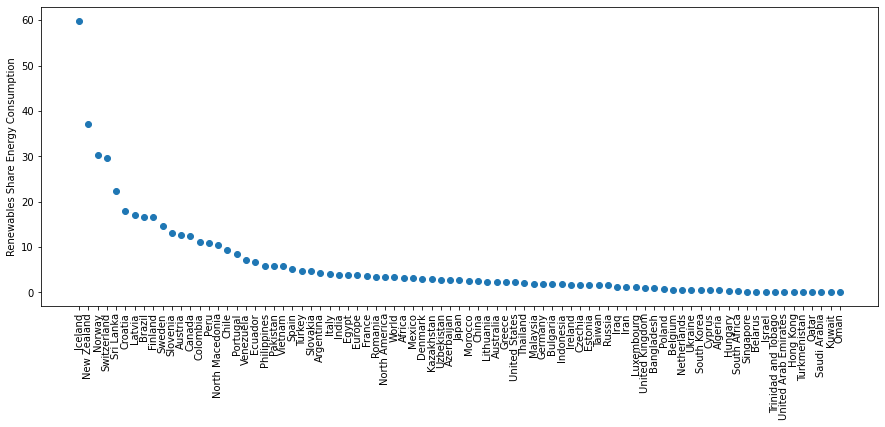

In [25]:
xgraf = renewables_share_energy3['country']
ygraf = renewables_share_energy3['renewables_share_energy']

fig, ax = plt.subplots(figsize=(15, 5.5))
plt.xticks(rotation=90)
ax.set_ylabel('Renewables Share Energy Consumption', size=10)
ax.scatter(xgraf, ygraf)



# Brazil, Iceland, New Zealand, China and Egypt

In [26]:
renewables_share_energy

,country,year,renewables_share_energy
7199,Iceland,2012,82.835
7198,Iceland,2011,82.545
7200,Iceland,2013,82.367
7197,Iceland,2010,82.334
7201,Iceland,2014,82.011
...,...,...,...
6436,Greenland,1920,0.000
6437,Greenland,1921,0.000
6438,Greenland,1922,0.000
6439,Greenland,1923,0.000


In [27]:
df

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,energy_cons_change_twh,biofuel_share_elec,biofuel_elec_per_capita,biofuel_cons_change_pct,biofuel_share_energy,biofuel_cons_change_twh,biofuel_consumption,biofuel_cons_per_capita,carbon_intensity_elec,coal_share_elec,coal_cons_change_pct,coal_share_energy,coal_cons_change_twh,coal_consumption,coal_elec_per_capita,coal_cons_per_capita,coal_production,coal_prod_per_capita,electricity_generation,biofuel_electricity,coal_electricity,fossil_electricity,gas_electricity,hydro_electricity,nuclear_electricity,oil_electricity,other_renewable_electricity,other_renewable_exc_biofuel_electricity,renewables_electricity,solar_electricity,wind_electricity,energy_per_gdp,energy_per_capita,fossil_cons_change_pct,fossil_share_energy,fossil_cons_change_twh,fossil_fuel_consumption,fossil_energy_per_capita,fossil_cons_per_capita,fossil_share_elec,gas_share_elec,gas_cons_change_pct,gas_share_energy,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_energy_per_capita,gas_production,gas_prod_per_capita,hydro_share_elec,hydro_cons_change_pct,hydro_share_energy,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_energy_per_capita,low_carbon_share_elec,low_carbon_electricity,low_carbon_elec_per_capita,low_carbon_cons_change_pct,low_carbon_share_energy,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_energy_per_capita,nuclear_share_elec,nuclear_cons_change_pct,nuclear_share_energy,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_energy_per_capita,oil_share_elec,oil_cons_change_pct,oil_share_energy,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_energy_per_capita,oil_production,oil_prod_per_capita,other_renewables_elec_per_capita,other_renewables_share_elec,other_renewables_cons_change_pct,other_renewables_share_energy,other_renewables_cons_change_twh,other_renewable_consumption,other_renewables_energy_per_capita,per_capita_electricity,population,primary_energy_consumption,renewables_elec_per_capita,renewables_share_elec,renewables_cons_change_pct,renewables_share_energy,renewables_cons_change_twh,renewables_consumption,renewables_energy_per_capita,solar_share_elec,solar_cons_change_pct,solar_share_energy,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
0,AFG,Afghanistan,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5021241.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1901,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5053439.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,1902,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [28]:
df_2 = df[['country','year','renewables_share_energy']]
df_brazil = df_2.loc[renewables_share_energy['country']=='Brazil']


In [29]:
df_brazil.dropna(inplace=True)

<ipython-input-29-5972f3f61910>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brazil.dropna(inplace=True)


In [30]:
df_brazil.head()

,country,year,renewables_share_energy
2179,Brazil,1965,26.319
2180,Brazil,1966,26.386
2181,Brazil,1967,26.641
2182,Brazil,1968,24.385
2183,Brazil,1969,23.901


In [31]:
df_2 = df[['country','year','renewables_share_energy']]
df_iceland = df_2.loc[renewables_share_energy['country']=='Iceland']
df_iceland.head()

,country,year,renewables_share_energy
7152,Iceland,1965,23.831
7153,Iceland,1966,22.105
7154,Iceland,1967,23.785
7155,Iceland,1968,23.237
7156,Iceland,1969,29.315


In [32]:
df_2 = df[['country','year','renewables_share_energy']]
df_nz = df_2.loc[renewables_share_energy['country']=='New Zealand']
df_nz.dropna(inplace=True)
df_nz.head()

<ipython-input-32-b58f3a1d00f1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nz.dropna(inplace=True)


,country,year,renewables_share_energy
10771,New Zealand,1965,37.885
10772,New Zealand,1966,38.167
10773,New Zealand,1967,38.447
10774,New Zealand,1968,39.765
10775,New Zealand,1969,38.756


In [33]:
df_2 = df[['country','year','renewables_share_energy']]
df_china = df_2.loc[renewables_share_energy['country']=='China']
df_china.dropna(inplace=True)
df_china.head()

<ipython-input-33-71ae73085ae3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_china.dropna(inplace=True)


,country,year,renewables_share_energy
3410,China,1965,4.006
3411,China,1966,3.751
3412,China,1967,3.595
3413,China,1968,4.200
3414,China,1969,3.509


In [34]:
df_2 = df[['country','year','renewables_share_energy']]
df_egypt = df_2.loc[renewables_share_energy['country']=='Egypt']
df_egypt.dropna(inplace=True)
df_egypt.head()

<ipython-input-34-a8e4da5f1142>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_egypt.dropna(inplace=True)


,country,year,renewables_share_energy
4926,Egypt,1965,5.267
4927,Egypt,1966,5.274
4928,Egypt,1967,6.643
4929,Egypt,1968,9.410
4930,Egypt,1969,15.256


In [35]:
df_egypt.rename(columns={'country':'Country','year':'Year','renewables_share_energy':'Egypt_RSE'}, inplace=True)
egypt = df_egypt['Egypt_RSE']
egypt.reset_index(drop=True,inplace=True)




C:\Users\Samsung\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [36]:
egypt.head()

0     5.267
1     5.274
2     6.643
3     9.410
4    15.256
Name: Egypt_RSE, dtype: float64

In [37]:
df_brazil.rename(columns={'country':'Country','year':'Year','renewables_share_energy':'Brazil_RSE'}, inplace=True)
df_brazil.reset_index(drop=True,inplace=True)
brazil = df_brazil['Brazil_RSE']
brazil.head()

0    26.319
1    26.386
2    26.641
3    24.385
4    23.901
Name: Brazil_RSE, dtype: float64

In [38]:
df_china.rename(columns={'country':'Country','year':'Year','renewables_share_energy':'China_RSE'}, inplace=True)
df_china.reset_index(drop=True,inplace=True)
china = df_china['China_RSE']
china.head()

0    4.006
1    3.751
2    3.595
3    4.200
4    3.509
Name: China_RSE, dtype: float64

In [39]:
df_nz.rename(columns={'country':'Country','year':'Year','renewables_share_energy':'NZ_RSE'}, inplace=True)
df_nz.reset_index(drop=True,inplace=True)
nz = df_nz['NZ_RSE']
nz.head()

0    37.885
1    38.167
2    38.447
3    39.765
4    38.756
Name: NZ_RSE, dtype: float64

In [40]:
df_iceland.rename(columns={'country':'Country','year':'Year','renewables_share_energy':'Iceland_RSE'}, inplace=True)
df_iceland.reset_index(drop=True,inplace=True)
iceland = df_iceland['Iceland_RSE']
iceland.head()

0    23.831
1    22.105
2    23.785
3    23.237
4    29.315
Name: Iceland_RSE, dtype: float64

In [41]:
c_evolution = pd.concat([egypt,brazil,china,nz,iceland],axis=1)
c_evolution.head()

,Egypt_RSE,Brazil_RSE,China_RSE,NZ_RSE,Iceland_RSE
0,5.267,26.319,4.006,37.885,23.831
1,5.274,26.386,3.751,38.167,22.105
2,6.643,26.641,3.595,38.447,23.785
3,9.410,24.385,4.200,39.765,23.237
4,15.256,23.901,3.509,38.756,29.315


In [42]:
years = df_egypt['Year']
years.head()

4926    1965
4927    1966
4928    1967
4929    1968
4930    1969
Name: Year, dtype: int64

In [43]:
c_evolution.set_index(years, inplace=True)
c_evolution.head()

,Egypt_RSE,Brazil_RSE,China_RSE,NZ_RSE,Iceland_RSE
Year,,,,,
1965,5.267,26.319,4.006,37.885,23.831
1966,5.274,26.386,3.751,38.167,22.105
1967,6.643,26.641,3.595,38.447,23.785
1968,9.410,24.385,4.200,39.765,23.237
1969,15.256,23.901,3.509,38.756,29.315


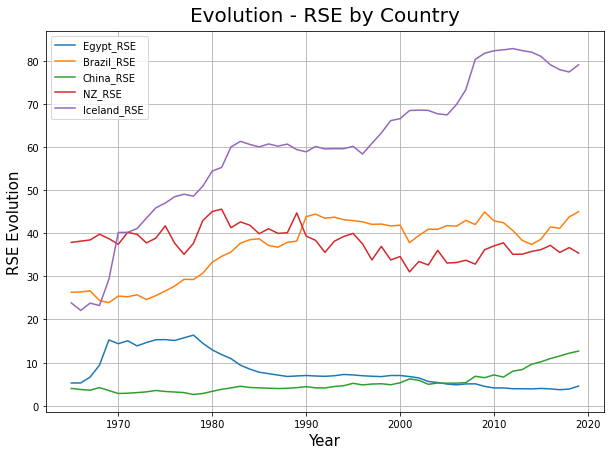

In [44]:
fig = plt.figure(figsize=(10,7))
x = c_evolution.index
y = c_evolution['Egypt_RSE']
y1 = c_evolution['Brazil_RSE']
y2 = c_evolution['China_RSE']
y3 = c_evolution['NZ_RSE']
y4 = c_evolution['Iceland_RSE']
plt.errorbar(x,y,label = 'Egypt_RSE')
plt.errorbar(x,y1,label = 'Brazil_RSE')
plt.errorbar(x,y2,label = 'China_RSE')
plt.errorbar(x,y3,label = 'NZ_RSE')
plt.errorbar(x,y4,label = 'Iceland_RSE')
plt.xlabel('Year', size=15)
plt.ylabel('RSE Evolution', size=15)
plt.grid(True)
plt.title('Evolution - RSE by Country', size=20, pad=10)
plt.legend(loc='upper left')

# The 5 Top

In [45]:
usa_all = df.loc[df['country'] == 'United States']
china_all = df.loc[df['country'] == 'China']
brazil_all = df.loc[df['country'] == 'Brazil']
canada_all = df.loc[df['country'] == 'Canada']
russia_all = df.loc[df['country'] == 'Russia']

In [46]:
usa_all.reset_index(drop=True, inplace=True)
china_all.reset_index(drop=True, inplace=True)
brazil_all.reset_index(drop=True, inplace=True)
canada_all.reset_index(drop=True, inplace=True)
russia_all.reset_index(drop=True, inplace=True)


In [47]:
russia_all

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,energy_cons_change_twh,biofuel_share_elec,biofuel_elec_per_capita,biofuel_cons_change_pct,biofuel_share_energy,biofuel_cons_change_twh,biofuel_consumption,biofuel_cons_per_capita,carbon_intensity_elec,coal_share_elec,coal_cons_change_pct,coal_share_energy,coal_cons_change_twh,coal_consumption,coal_elec_per_capita,coal_cons_per_capita,coal_production,coal_prod_per_capita,electricity_generation,biofuel_electricity,coal_electricity,fossil_electricity,gas_electricity,hydro_electricity,nuclear_electricity,oil_electricity,other_renewable_electricity,other_renewable_exc_biofuel_electricity,renewables_electricity,solar_electricity,wind_electricity,energy_per_gdp,energy_per_capita,fossil_cons_change_pct,fossil_share_energy,fossil_cons_change_twh,fossil_fuel_consumption,fossil_energy_per_capita,fossil_cons_per_capita,fossil_share_elec,gas_share_elec,gas_cons_change_pct,gas_share_energy,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_energy_per_capita,gas_production,gas_prod_per_capita,hydro_share_elec,hydro_cons_change_pct,hydro_share_energy,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_energy_per_capita,low_carbon_share_elec,low_carbon_electricity,low_carbon_elec_per_capita,low_carbon_cons_change_pct,low_carbon_share_energy,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_energy_per_capita,nuclear_share_elec,nuclear_cons_change_pct,nuclear_share_energy,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_energy_per_capita,oil_share_elec,oil_cons_change_pct,oil_share_energy,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_energy_per_capita,oil_production,oil_prod_per_capita,other_renewables_elec_per_capita,other_renewables_share_elec,other_renewables_cons_change_pct,other_renewables_share_energy,other_renewables_cons_change_twh,other_renewable_consumption,other_renewables_energy_per_capita,per_capita_electricity,population,primary_energy_consumption,renewables_elec_per_capita,renewables_share_elec,renewables_cons_change_pct,renewables_share_energy,renewables_cons_change_twh,renewables_consumption,renewables_energy_per_capita,solar_share_elec,solar_cons_change_pct,solar_share_energy,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
0,RUS,Russia,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.312,1670.532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.278,1855.085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64836676.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,RUS,Russia,1901,2.296,2.487,NaN,0.000,11.816,14.212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.799,1693.283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,134.489,2055.332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65434412.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,RUS,Russia,1902,-0.369,-0.409,NaN,0.000,-5.016,-6.745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.390,1671.858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [48]:
#selecting the same columns for the top 5
china_rpc = china_all[['country', 
                   'year', 
                   'renewables_electricity',
                   'other_renewables_elec_per_capita',
                   'other_renewables_energy_per_capita',
                   'renewables_elec_per_capita',
                   'renewables_energy_per_capita']]

usa_rpc = usa_all[['country', 
                   'year', 
                   'renewables_electricity',
                   'other_renewables_elec_per_capita',
                   'other_renewables_energy_per_capita',
                   'renewables_elec_per_capita',
                   'renewables_energy_per_capita']]
brazil_rpc = brazil_all[['country', 
                   'year', 
                   'renewables_electricity',
                   'other_renewables_elec_per_capita',
                   'other_renewables_energy_per_capita',
                   'renewables_elec_per_capita',
                   'renewables_energy_per_capita']]
canada_rpc = canada_all[['country', 
                   'year', 
                   'renewables_electricity',
                   'other_renewables_elec_per_capita',
                   'other_renewables_energy_per_capita',
                   'renewables_elec_per_capita',
                   'renewables_energy_per_capita']]
russia_rpc = russia_all[['country', 
                   'year', 
                   'renewables_electricity',
                   'other_renewables_elec_per_capita',
                   'other_renewables_energy_per_capita',
                   'renewables_elec_per_capita',
                   'renewables_energy_per_capita']]

In [49]:
#checking for nulls

In [50]:
china_rpc.isnull().count()

country                               121
year                                  121
renewables_electricity                121
other_renewables_elec_per_capita      121
other_renewables_energy_per_capita    121
renewables_elec_per_capita            121
renewables_energy_per_capita          121
dtype: int64

In [51]:
usa_rpc.isnull().count()

country                               121
year                                  121
renewables_electricity                121
other_renewables_elec_per_capita      121
other_renewables_energy_per_capita    121
renewables_elec_per_capita            121
renewables_energy_per_capita          121
dtype: int64

In [52]:
brazil_rpc.isnull().count()

country                               121
year                                  121
renewables_electricity                121
other_renewables_elec_per_capita      121
other_renewables_energy_per_capita    121
renewables_elec_per_capita            121
renewables_energy_per_capita          121
dtype: int64

In [53]:
canada_rpc.isnull().count()

country                               121
year                                  121
renewables_electricity                121
other_renewables_elec_per_capita      121
other_renewables_energy_per_capita    121
renewables_elec_per_capita            121
renewables_energy_per_capita          121
dtype: int64

In [54]:
russia_rpc.isnull().count()

country                               121
year                                  121
renewables_electricity                121
other_renewables_elec_per_capita      121
other_renewables_energy_per_capita    121
renewables_elec_per_capita            121
renewables_energy_per_capita          121
dtype: int64

In [55]:
#same number of nulls, so we will drop it from the every table
#reseting the index for better conformity

In [56]:
china_rpc.dropna(inplace=True)
china_rpc.reset_index(drop=True, inplace=True)
china_rpc.head()


<ipython-input-56-d073968728d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  china_rpc.dropna(inplace=True)


,country,year,renewables_electricity,other_renewables_elec_per_capita,other_renewables_energy_per_capita,renewables_elec_per_capita,renewables_energy_per_capita
0,China,1985,92.388,0.0,0.0,85.895,238.597
1,China,1986,94.549,0.0,0.0,86.345,239.847
2,China,1987,100.024,0.0,0.0,89.620,248.944
3,China,1988,109.168,0.0,0.0,95.953,266.536
4,China,1989,118.409,0.0,0.0,102.221,283.949


In [57]:
usa_rpc.dropna(inplace=True)
usa_rpc.reset_index(drop=True, inplace=True)
usa_rpc.head()

<ipython-input-57-a2091b60072e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_rpc.dropna(inplace=True)


,country,year,renewables_electricity,other_renewables_elec_per_capita,other_renewables_energy_per_capita,renewables_elec_per_capita,renewables_energy_per_capita
0,United States,1985,323.592,151.322,420.339,1345.496,3737.492
1,United States,1986,335.695,159.422,442.838,1382.810,3841.141
2,United States,1987,298.090,174.107,483.631,1216.430,3378.975
3,United States,1988,270.789,171.378,476.050,1094.662,3040.731
4,United States,1989,325.965,195.631,543.421,1305.290,3625.810


In [58]:
brazil_rpc.dropna(inplace=True)
brazil_rpc.reset_index(drop=True, inplace=True)
brazil_rpc.head()

<ipython-input-58-a2092682ab42>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brazil_rpc.dropna(inplace=True)


,country,year,renewables_electricity,other_renewables_elec_per_capita,other_renewables_energy_per_capita,renewables_elec_per_capita,renewables_energy_per_capita
0,Brazil,1985,181.442,22.673,62.982,1341.293,3725.818
1,Brazil,1986,185.613,23.126,64.239,1343.960,3733.225
2,Brazil,1987,189.166,25.308,70.300,1342.629,3729.528
3,Brazil,1988,202.433,23.253,64.592,1409.424,3915.070
4,Brazil,1989,208.093,23.257,64.603,1422.101,3950.283


In [59]:
canada_rpc.dropna(inplace=True)
canada_rpc.reset_index(drop=True, inplace=True)
canada_rpc.head()

<ipython-input-59-f293cea13887>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canada_rpc.dropna(inplace=True)


,country,year,renewables_electricity,other_renewables_elec_per_capita,other_renewables_energy_per_capita,renewables_elec_per_capita,renewables_energy_per_capita
0,Canada,1985,305.323,65.139,180.941,11859.507,32943.101
1,Canada,1986,312.501,71.522,198.672,11984.238,33289.578
2,Canada,1987,318.519,87.466,242.962,12050.051,33472.391
3,Canada,1988,309.921,92.703,257.509,11561.628,32115.659
4,Canada,1989,293.928,127.930,355.360,10814.517,30040.348


In [60]:
russia_rpc.dropna(inplace=True)
russia_rpc.reset_index(drop=True, inplace=True)
russia_rpc.head()

<ipython-input-60-7d58c47691b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  russia_rpc.dropna(inplace=True)


,country,year,renewables_electricity,other_renewables_elec_per_capita,other_renewables_energy_per_capita,renewables_elec_per_capita,renewables_energy_per_capita
0,Russia,1985,159.726,0.0,0.0,1117.301,3103.616
1,Russia,1986,164.331,0.0,0.0,1141.227,3170.077
2,Russia,1987,162.528,0.0,0.0,1120.627,3112.855
3,Russia,1988,160.924,0.0,0.0,1102.118,3061.443
4,Russia,1989,159.726,0.0,0.0,1087.577,3021.051


# Order of analysis: China, USA, Canada, Brazil and Russia

In [61]:
china_rpc

,country,year,renewables_electricity,other_renewables_elec_per_capita,other_renewables_energy_per_capita,renewables_elec_per_capita,renewables_energy_per_capita
0,China,1985,92.388,0.000,0.000,85.895,238.597
1,China,1986,94.549,0.000,0.000,86.345,239.847
2,China,1987,100.024,0.000,0.000,89.620,248.944
3,China,1988,109.168,0.000,0.000,95.953,266.536
4,China,1989,118.409,0.000,0.000,102.221,283.949
5,China,1990,126.812,0.054,0.151,107.752,299.312
6,China,1991,124.764,0.054,0.149,104.589,290.526
7,China,1992,130.933,0.094,0.260,108.504,301.401
8,China,1993,152.179,0.096,0.267,124.858,346.829
9,China,1994,168.278,0.374,1.039,136.809,380.025


In [70]:
cr = pd.DataFrame([china_rpc['year'],
                  china_rpc['renewables_electricity'],
                  usa_rpc['renewables_electricity'],
                  canada_rpc['renewables_electricity'],
                  brazil_rpc['renewables_electricity'],
                  russia_rpc['renewables_electricity']]).transpose() 
cr

,year,renewables_electricity,renewables_electricity,renewables_electricity,renewables_electricity,renewables_electricity
0,1985.0,92.388,323.592,305.323,181.442,159.726
1,1986.0,94.549,335.695,312.501,185.613,164.331
2,1987.0,100.024,298.090,318.519,189.166,162.528
3,1988.0,109.168,270.789,309.921,202.433,160.924
4,1989.0,118.409,325.965,293.928,208.093,159.726
5,1990.0,126.812,352.928,299.639,210.567,166.911
6,1991.0,124.764,351.337,311.262,221.782,168.159
7,1992.0,130.933,319.567,319.701,228.272,172.657
8,1993.0,152.179,349.687,327.092,240.049,174.349
9,1994.0,168.278,329.680,333.650,248.093,175.987


In [77]:
#renaming
cr.columns =['Year',
            'China Renewables',
            'USA Renewables',
            'Canada Renewables',
            'Brazil Renewables',
            'Russia Renewables']
cr.set_index('Year', inplace=True)


Text(0.5, 1.0, 'Renewables Generation of Electricity\nin TeraWatt/Hour by Country')

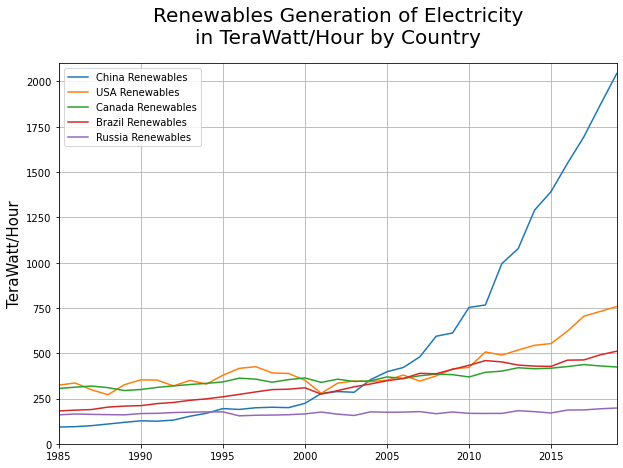

In [78]:
fig = plt.figure(figsize=(10,7))

x = cr.index
y = cr['China Renewables']
y1 = cr['USA Renewables']
y2 = cr['Canada Renewables']        
y3 = cr['Brazil Renewables']              
y4 = cr['Russia Renewables']                

plt.xlim([1985,2019])
plt.ylim([0,2100])

plt.plot(x,y, label = 'China Renewables')
plt.plot(x,y1, label = 'USA Renewables')
plt.plot(x,y2, label = 'Canada Renewables')
plt.plot(x,y3, label = 'Brazil Renewables')
plt.plot(x,y4, label = 'Russia Renewables')

plt.grid(True)
plt.ylabel('TeraWatt/Hour', size = 15)


plt.legend(loc='upper left')
plt.title('Renewables Generation of Electricity\nin TeraWatt/Hour by Country', size = 20, pad=20)

In [66]:
# top 5 in 2019

In [79]:
c_2019 = cr.loc[cr.index == 2019]
c_2019

,China Renewables,USA Renewables,Canada Renewables,Brazil Renewables,Russia Renewables
Year,,,,,
2019.0,2043.258,757.393,423.82,511.053,197.462


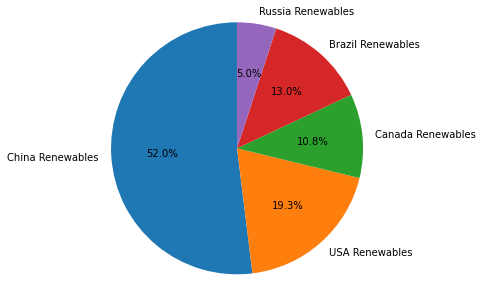

In [80]:
labels = c_2019.columns[0], c_2019.columns[1], c_2019.columns[2], c_2019.columns[3],c_2019.columns[4]
sizes = c_2019.iloc[0][0], c_2019.iloc[0][1], c_2019.iloc[0][2], c_2019.iloc[0][3],c_2019.iloc[0][4]

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, labels=labels, startangle=90,autopct='%1.1f%%')
ax1.axis('equal')

plt.show()

In [88]:
world = df.loc[df['country'] == 'World']
world_df = world[['country', 
                   'year', 
                   'renewables_electricity',
                   'other_renewables_elec_per_capita',
                   'other_renewables_energy_per_capita',
                   'renewables_elec_per_capita',
                   'renewables_energy_per_capita']]
world_df

,country,year,renewables_electricity,other_renewables_elec_per_capita,other_renewables_energy_per_capita,renewables_elec_per_capita,renewables_energy_per_capita
16904,World,1900,NaN,NaN,NaN,NaN,NaN
16905,World,1901,NaN,NaN,NaN,NaN,NaN
16906,World,1902,NaN,NaN,NaN,NaN,NaN
16907,World,1903,NaN,NaN,NaN,NaN,NaN
16908,World,1904,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
17020,World,2016,5900.412,79.366,184.588,790.514,2098.487
17021,World,2017,6276.014,82.431,193.066,831.496,2194.493
17022,World,2018,6712.063,86.992,200.313,879.568,2298.676
17023,World,2019,7065.089,88.531,209.248,915.942,2398.941


In [93]:
world_df.dropna(inplace=True)

<ipython-input-93-73af1fd18517>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_df.dropna(inplace=True)


In [95]:
world_df.reset_index(drop=True, inplace=True)

In [96]:
world_df

,country,year,renewables_electricity,other_renewables_elec_per_capita,other_renewables_energy_per_capita,renewables_elec_per_capita,renewables_energy_per_capita
0,World,1985,2057.643,15.971,44.363,422.434,1173.429
1,World,1986,2092.305,17.252,47.922,421.787,1171.632
2,World,1987,2125.555,18.138,50.383,420.692,1168.590
3,World,1988,2193.343,18.323,50.898,426.271,1184.086
4,World,1989,2194.831,19.924,55.343,419.066,1164.072
5,World,1990,2279.887,21.955,60.987,427.969,1208.092
6,World,1991,2335.985,22.530,62.583,431.448,1218.532
7,World,1992,2345.218,23.812,66.145,426.487,1204.074
8,World,1993,2482.781,24.237,67.325,444.815,1255.515
9,World,1994,2505.014,24.794,68.871,442.336,1249.922
